# Logistic Regression
### Techinque to predict the outcome of binary classification problem

# Assumption Data should be Linearly separable

# 2 Approaches 
### 1. Probalistic Approach
### 2. Geometric approach(Distance Approach)

## Application Flow 
Logistic Regression is one of the most fundamental algorithms for classification in the Machine Learning world.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow_bold.PNG" width= "300">

## Introduction
In linear regression, the type of data we deal with is quantitative, whereas we use classification models to deal with qualitative data or categorical data. The algorithms used for solving a classification problem first predict the probability of each of the categories of the qualitative variables, as the basis for making the classification. And, as the probabilities are continuous numbers, classification using probabilities also behave like regression methods. 
Logistic regression is one such type of classification model which is used to classify the dependent variable into two or more classes or categories. 

###### Why don’t we use Linear regression for classification problems?


Let’s suppose you took a survey and noted the response of each person as satisfied, neutral or Not satisfied.
Let’s map each category:

Satisfied – 2

Neutral – 1

Not Satisfied – 0

But this doesn’t mean that the gap between Not satisfied and Neutral is same as Neutral and satisfied. There is no mathematical significance of these mapping. We can also map the categories like:

Satisfied – 0

Neutral – 1

Not Satisfied – 2

It’s completely fine to choose the above mapping. If we apply linear regression to both the type of mappings, we will get different sets of predictions. Also, we can get prediction values like 1.2, 0.8, 2.3 etc. which makes no sense for categorical values. So, there is no normal method to convert qualitative data into quantitative data for use in linear regression.
Although, for binary classification, i.e. when there only two categorical values, using the least square method can give decent results. Suppose we have two categories Black and White and we map them as follows:

Black – 0

White - 1 

We can assign predicted values for both the categories such as Y> 0.5 goes to class white and vice versa.
Although, there will be some predictions for which the value can be greater than 1 or less than 0 making them hard to classify in any class. Nevertheless, linear regression can work decently for binary classification but not that well for multi-class classification. 
Hence, we use classification methods for dealing with such problems.


## Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.


# Sigmoid Function

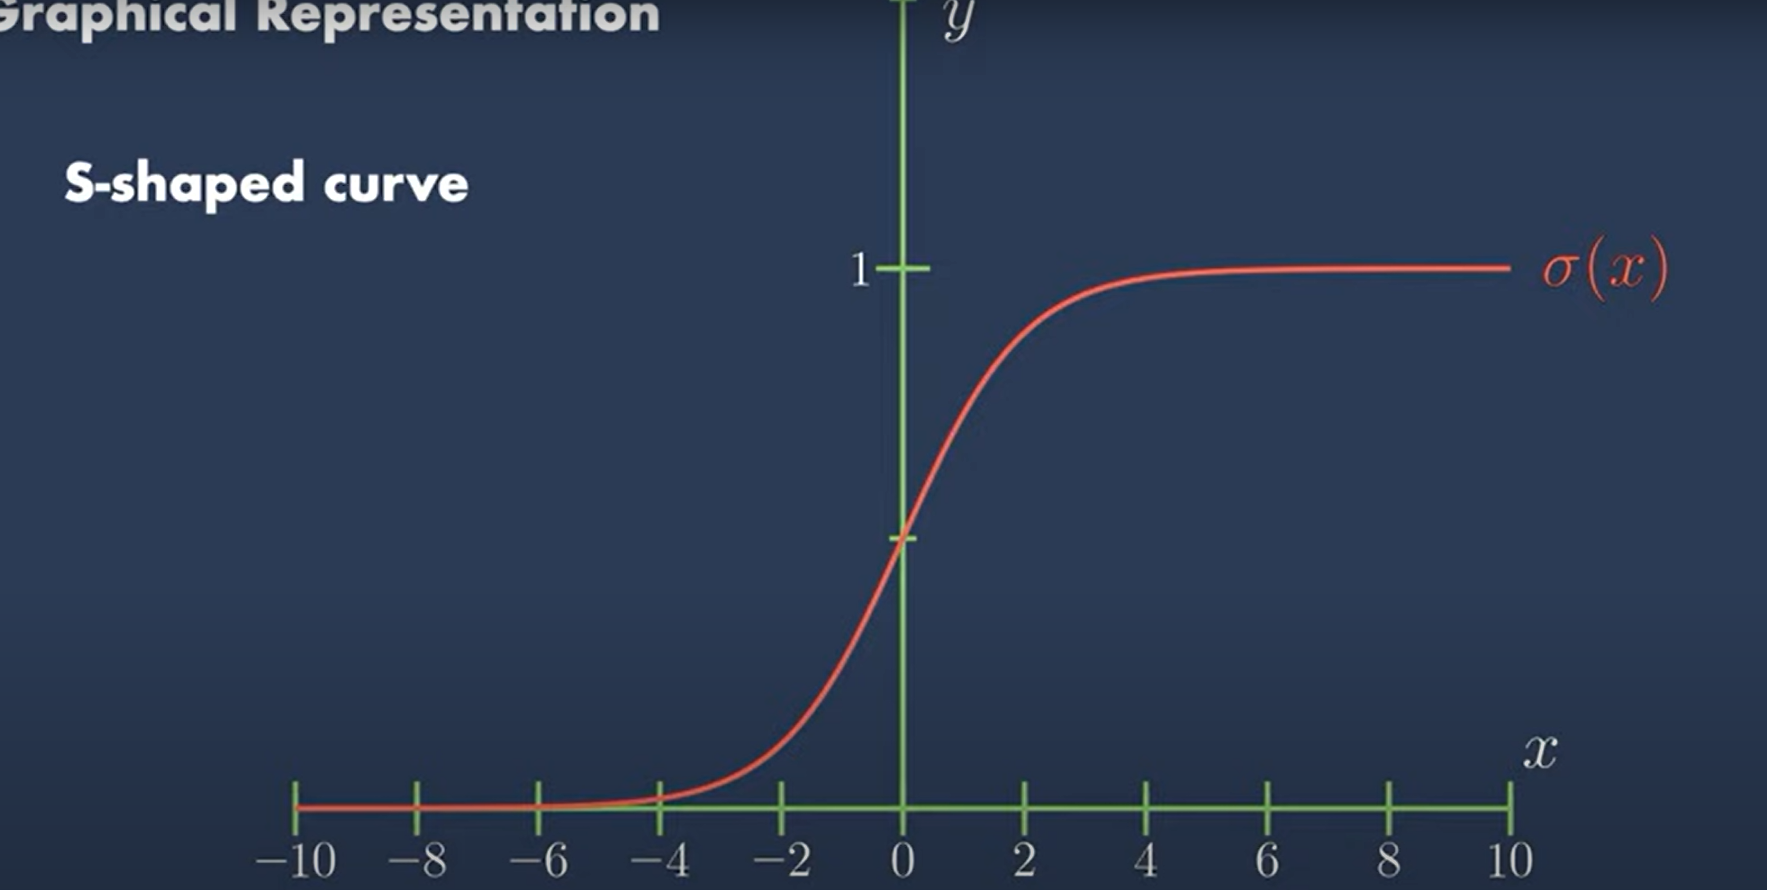
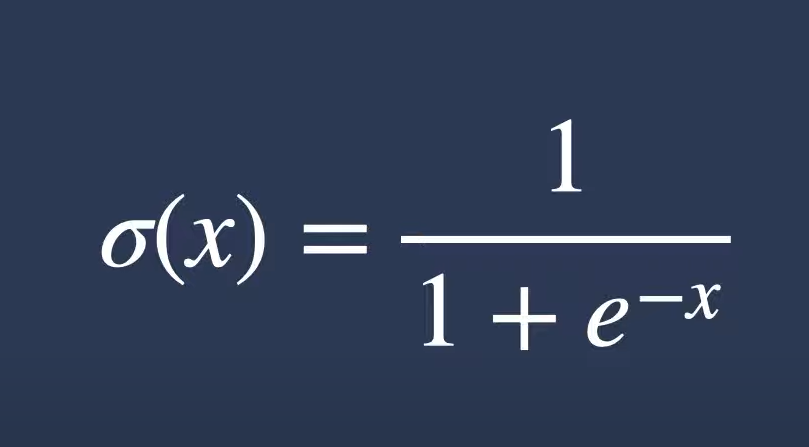
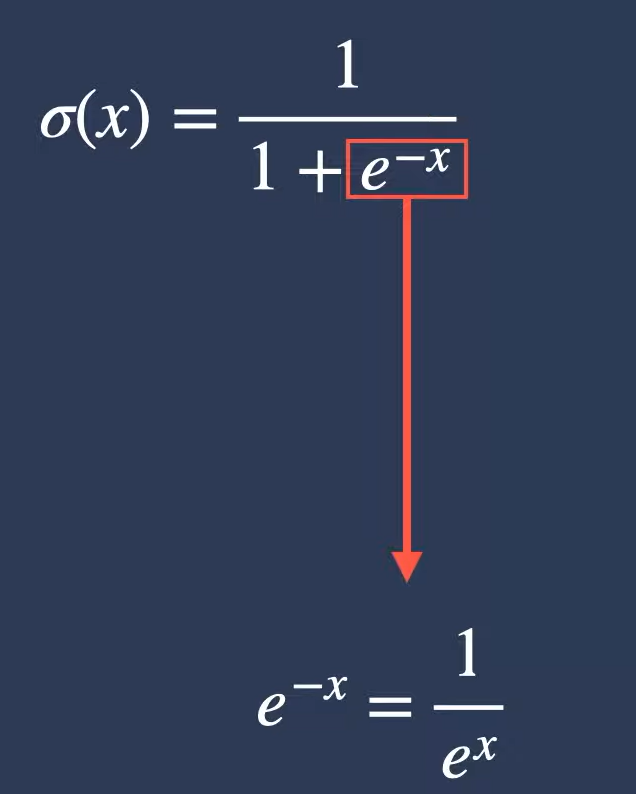
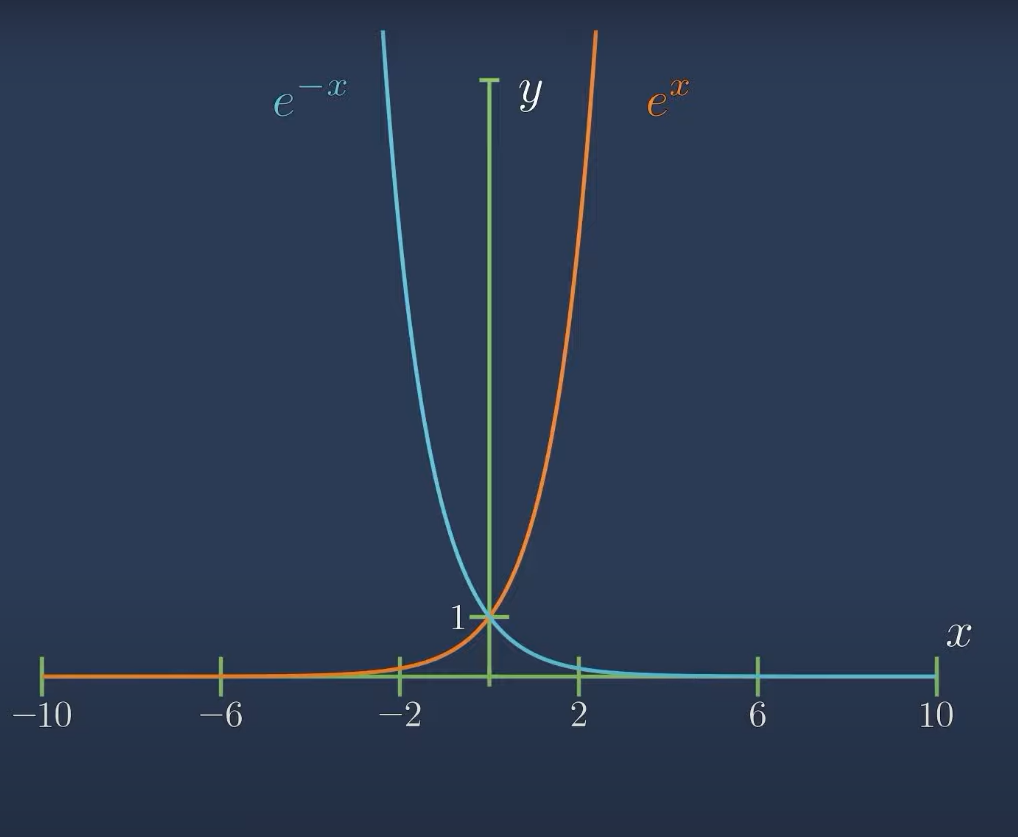
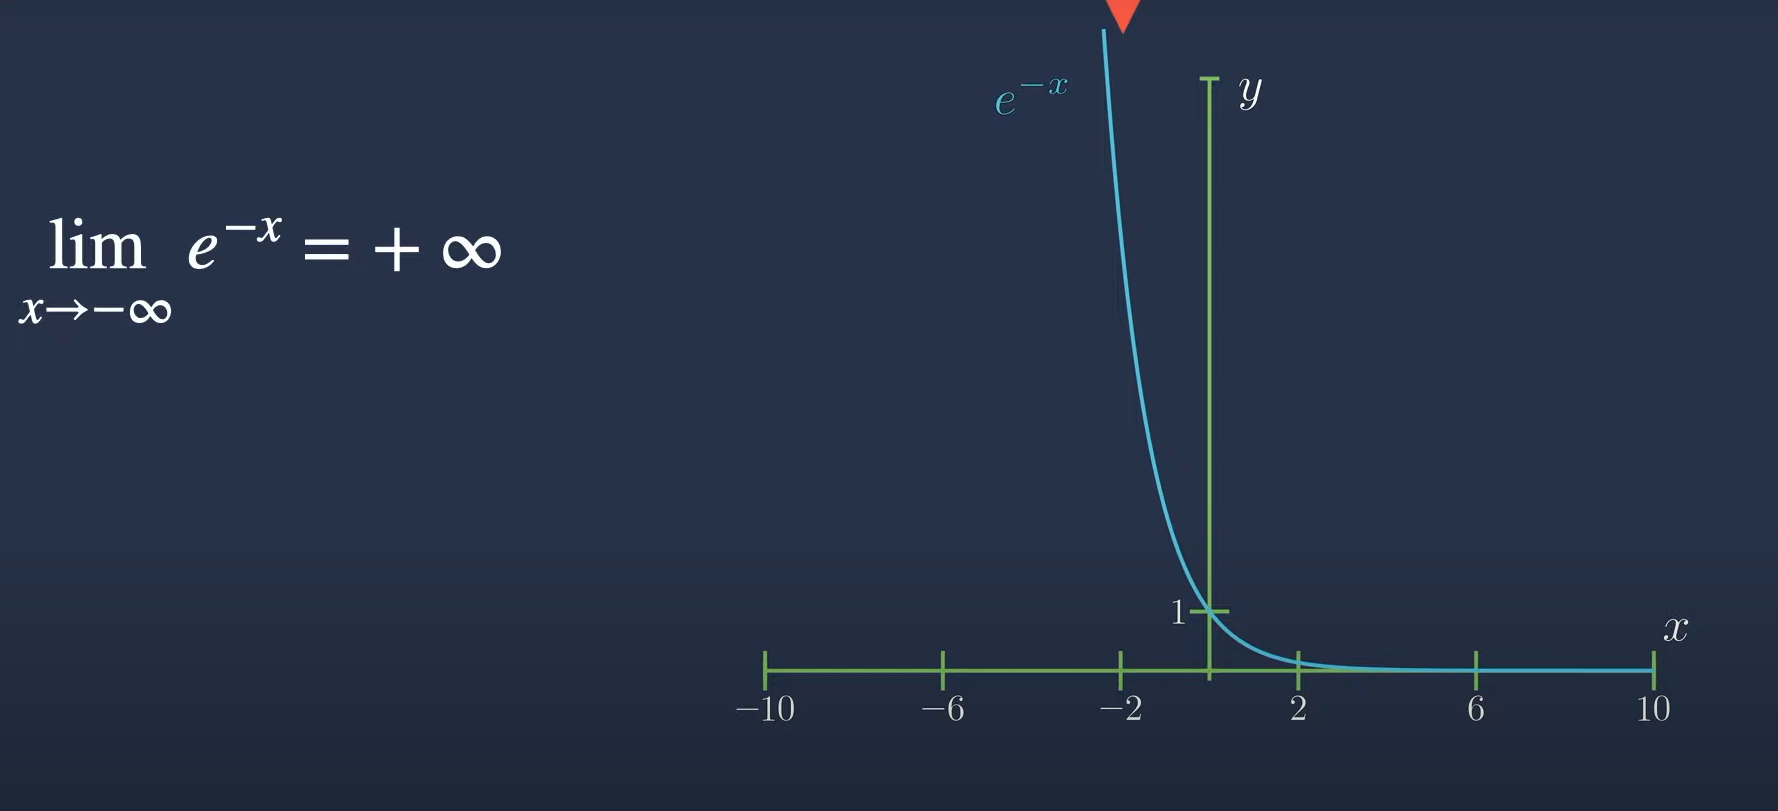
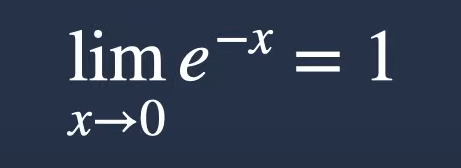
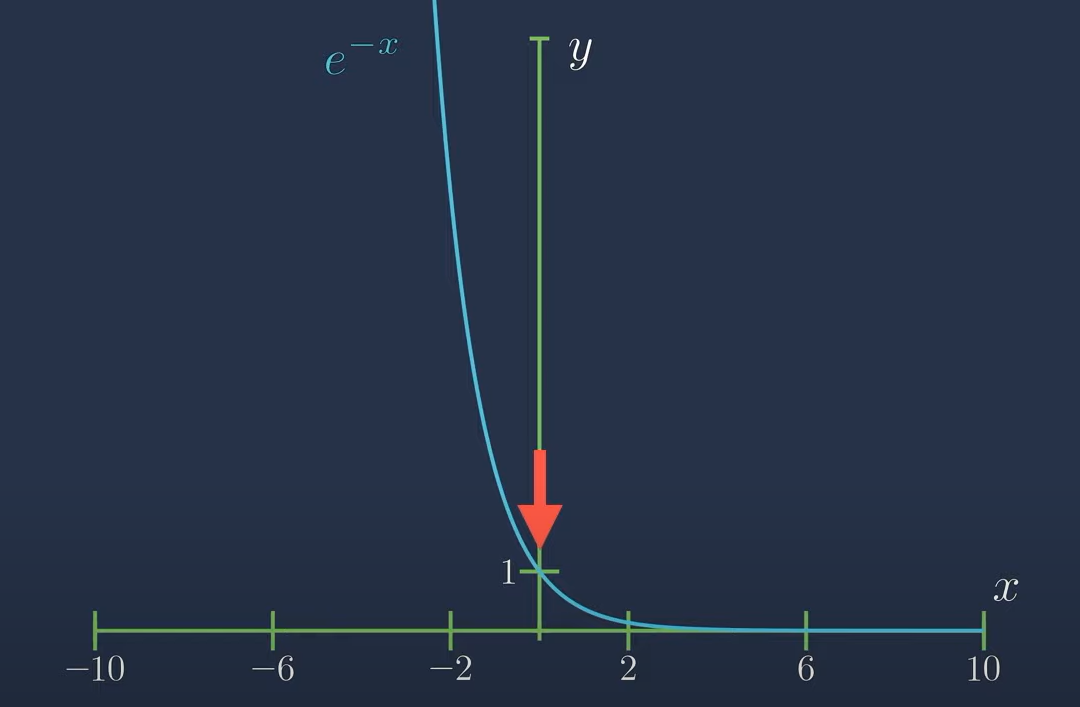
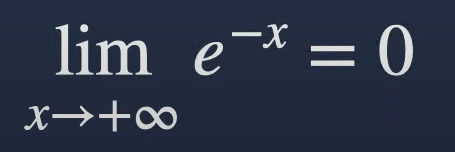
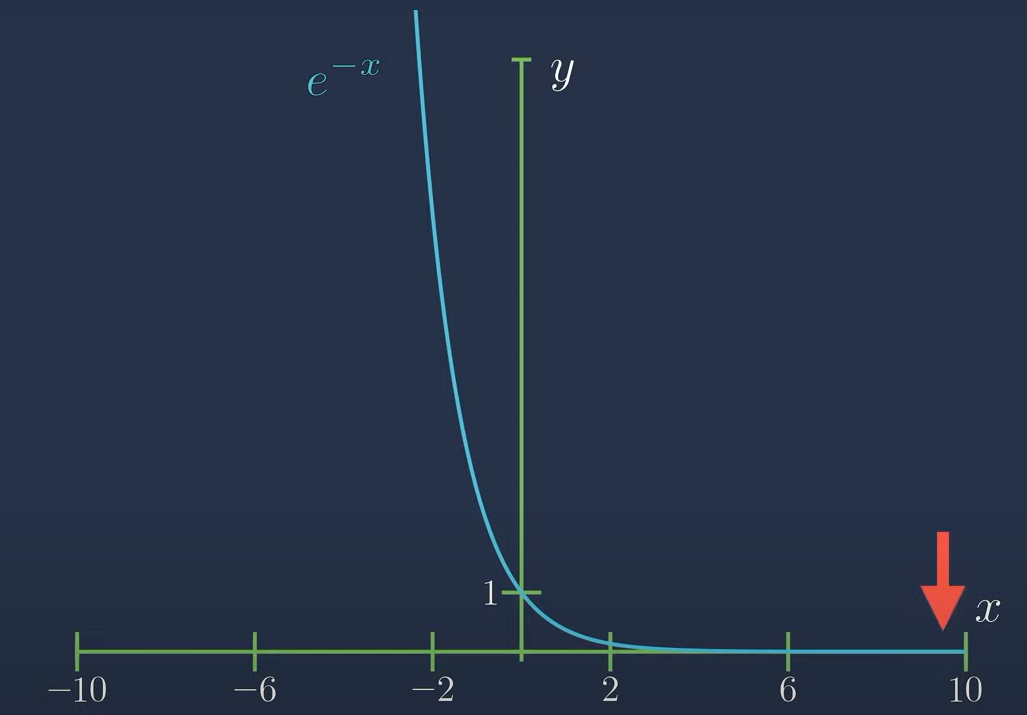
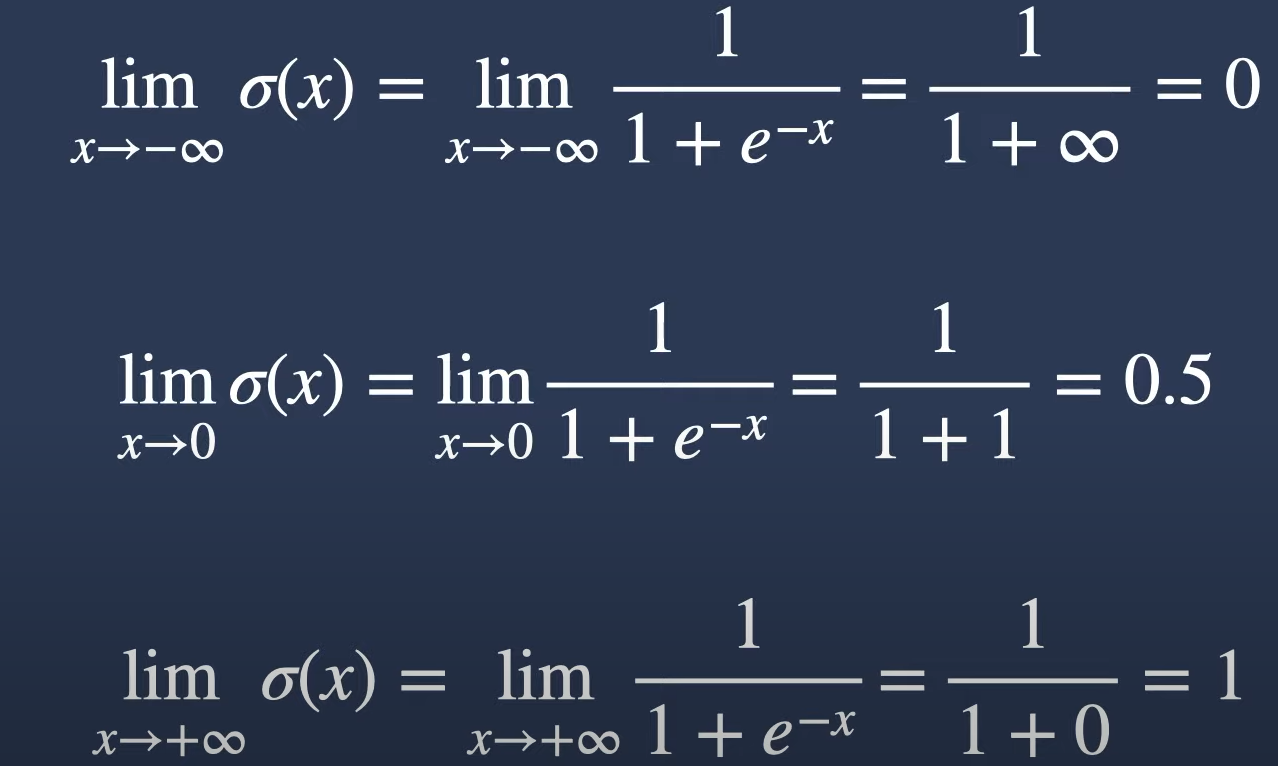
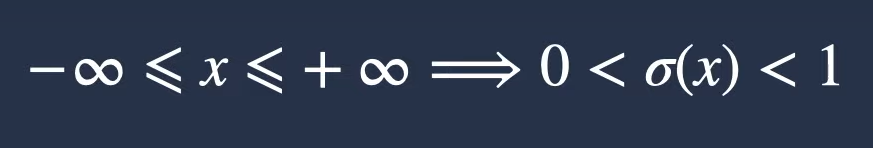

#### Sigmoid function 

We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:

<img src="sigmoid.PNG" width="300">

**Why do we use the Sigmoid Function?**

1)	The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the  Logistic function.
2)	 It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation.
3)	It is a simple way of introducing non-linearity to the model.

Although there are other functions as well, which can be used, but sigmoid is the most common function used for logistic regression. We will talk about the rest of the functions in the neural network section.

The logistic function is given as:

<img src="logistic_function.PNG" width="300">

Let’s see some manipulation with the logistic function: 

<img src="manip1.PNG" width="300">

We can see that the logit function is linear in terms with x.


**Prediction**

<img src="prediction.PNG" width="300">


**Cost Function**

<img src="cf1.PNG" width="300">

The cost function for the whole training set is given as :

<img src="cf2.PNG" width="300">

The values of parameters (θ) for which the cost function is minimum is calculated using the gradient descent (as discussed in the Linear Regression section) algorithm. The partial derivative for cost function is given as :

<img src="derivative.PNG" width="300">

### Multiple Logistic Function

We can generalise the simple logistic function for multiple features as:
<img src="multi.PNG" width="300">

And the logit function can be written as:

<img src="logit.PNG" width="300">

The coefficients are calculated the same we did for simple logistic function, by passing the above equation in the cost function.

Just like we did in multilinear regression, we will check for correlation between different features for Multi logistic as well.

We will see how we implement all the above concept through a practical example.


### Multinomial Logistics Regression( Number of Labels >2)

Many times, there are classification problems where the number of classes is greater than 2. 
We can extend Logistic regression for multi-class classification. The logic is simple; we train our logistic model for each class and calculate the probability(hθx) that a specific feature belongs to that class. Once we have trained the model for all the classes, we predict a new value’s class by choosing that class for which the probability(hθx) is maximum.
Although we have libraries that we can use to perform multinomial logistic regression, we rarely use logistic regression for classification problems where the number of classes is more than 2.
There are many other classification models for such scenarios. We will see more of that in the coming lectures.


### Learning Algorithm
The learning algorithm is how we search the set of possible hypotheses (hypothesis space $\mathcal{H}$) for the best parameterization (in this case the weight vector ${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error measure.

There is no sophisticted, closed-form solution like least-squares linear, so we will use gradient descent instead. Specifically we will use batch gradient descent which calculates the gradient from all data points in the data set.

Luckily, our "cross-entropy" error measure is convex so there is only one minimum. Thus the minimum we arrive at is the global minimum.

To learn we're going to minimize the following error measure using batch gradient descent.

$$
e(h({\bf x}_n), y_n) = \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right) \\
E_\text{in}({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} e(h({\bf x}_n), y_n) = \frac{1}{N} \sum_{n=1}^{N} \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right)
$$

We'll need the derivative of the point loss function and possibly some abuse of notation.

$$
\frac{d}{d{\bf w}} e(h({\bf x}_n), y_n)
= \frac{-y_n \; {\bf x}_n \; e^{-y_n {\bf w}^T {\bf x}_n}}{1 + e^{-y_n {\bf w}^T {\bf x}_n}}
= -\frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}}
$$

With the point loss derivative we can determine the gradient of the in-sample error:

$$
\begin{align}
\nabla E_\text{in}({\bf w})
&= \frac{d}{d{\bf w}} \left[ \frac{1}{N} \sum_{n=1}^N e(h({\bf x}_n), y_n) \right] \\
&= \frac{1}{N} \sum_{n=1}^N \frac{d}{d{\bf w}} e(h({\bf x}_n), y_n) \\
&= \frac{1}{N} \sum_{n=1}^N \left( - \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \right) \\
&= - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \\
\end{align}
$$

Our weight update rule per batch gradient descent becomes

$$
\begin{align}
{\bf w}_{i+1} &= {\bf w}_i - \eta \; \nabla E_\text{in}({\bf w}_i) \\
&= {\bf w}_i - \eta \; \left( - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
&= {\bf w}_i + \eta \; \left( \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
\end{align}
$$

where $\eta$ is the learning rate.

## Evaluation of a Classification Model

In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is?
For a  regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics
In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values.
In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted.
The different metrics used for this purpose are:
- Accuracy
- Recall
- Precision
- F1 Score
- Specifity
- AUC( Area Under the Curve)
- RUC(Receiver Operator Characteristic)

### Confusion Matrix

A typical confusion matrix looks like the figure shown.

<img src="confusionMatrix.PNG" width="300">

Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

### Accuracy
The mathematical formula is :

   __Accuracy__= $ \frac{ (TP+TN)}{(TP+TN+FP+FN)} $
    
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications. 


#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

Let’s suppose in the previous model, the model gave 50 correct predictions(TP) but failed to identify 200 cancer patients(FN). Recall in that case will be:

Recall=$ \frac {50}{(50+200)} $= 0.2 (The model was able to recall only 20% of the cancer patients)


### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $

Let’s suppose in the previous example, the model identified 50 people as cancer patients(TP) but also raised a  false alarm for 100 patients(FP). Hence,

Precision=$ \frac {50}{(50+100)} $=0.33 (The model only has a precision of 33%)


### But we have a problem!!

As evident from the previous example, the model had a very high Accuracy but performed poorly in terms of Precision and Recall. So, necessarily _Accuracy_ is not the metric to use for evaluating the model in this case.

Imagine a scenario, where the requirement was that the model recalled all the defaulters who did not pay back the loan. Suppose there were 10 such defaulters and to recall those 10 defaulters, and the model gave you 20 results out of which only the 10 are the actual defaulters. Now, the recall of the model is 100%, but the precision goes down to 50%.


### A Trade-off?

<img src="tradeoff.PNG" width="300">

As observed from the graph, with an increase in the Recall, there is a drop in Precision of the model.

So the question is - what to go for? Precision or Recall?

Well, the answer is: it depends on the business requirement.

For example, if you are predicting cancer, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision.

Can we maximise both at the same time? No

So, there is a need for a better metric then?

Yes. And it’s called an _F1 Score_


### F1 Score

From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall. 

The mathematical formula is:
        F1 score= $ \frac {2*((Precision*Recall)}{(Precision+Recall))} $


### Specificity or True Negative Rate

This represents how specific is the model while predicting the True Negatives.
Mathematically,

   Specificity=$ \frac {TN}{(TN+FP)} $
Or, it can be said that it quantifies the total number of negatives predicted by the model with respect to the total number of actual negative or non favorable outcomes.

Similarly, False Positive rate can be defined as:  (1- specificity)
Or,  $ \frac {FP}{(TN+FP)} $


### ROC(Receiver Operator Characteristic)

We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome. 

Now, the question is, what should be an ideal threshold?


The following diagram shows a typical logistic regression curve.
<img src="logisticRegression.PNG" width="300">

* The horizontal lines represent the various values of thresholds ranging from 0 to 1.
* Let’s suppose our classification problem was to identify the obese people from the given data.
* The green markers represent obese people and the red markers represent the non-obese people.
* Our confusion matrix will depend on the value of the threshold chosen by us.
* For Example, if 0.25 is the threshold then
        TP(actually obese)=3
        TN(Not obese)=2
        FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line)
        FN(Obese but predicted as not obese )=1(Green circle below 0.25line  )


A typical ROC curve looks like the following figure.
<img src="ROC.PNG" width="300">

* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The green dotted line represents the scenario when the true positive rate equals the false positive rate.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* The ROC curve answers our question of which threshold to choose.


### But we have a confusion!!

Let’s suppose that we used different classification algorithms, and different ROCs for the corresponding algorithms have been plotted.
The question is: which algorithm to choose now?
The answer is to calculate the area under each ROC curve.

#### AUC(Area Under Curve)

<img src="AUC.PNG" width="300">

* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one


 ## Python Implementation

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [3]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data. Great, let's see the distribution of data:

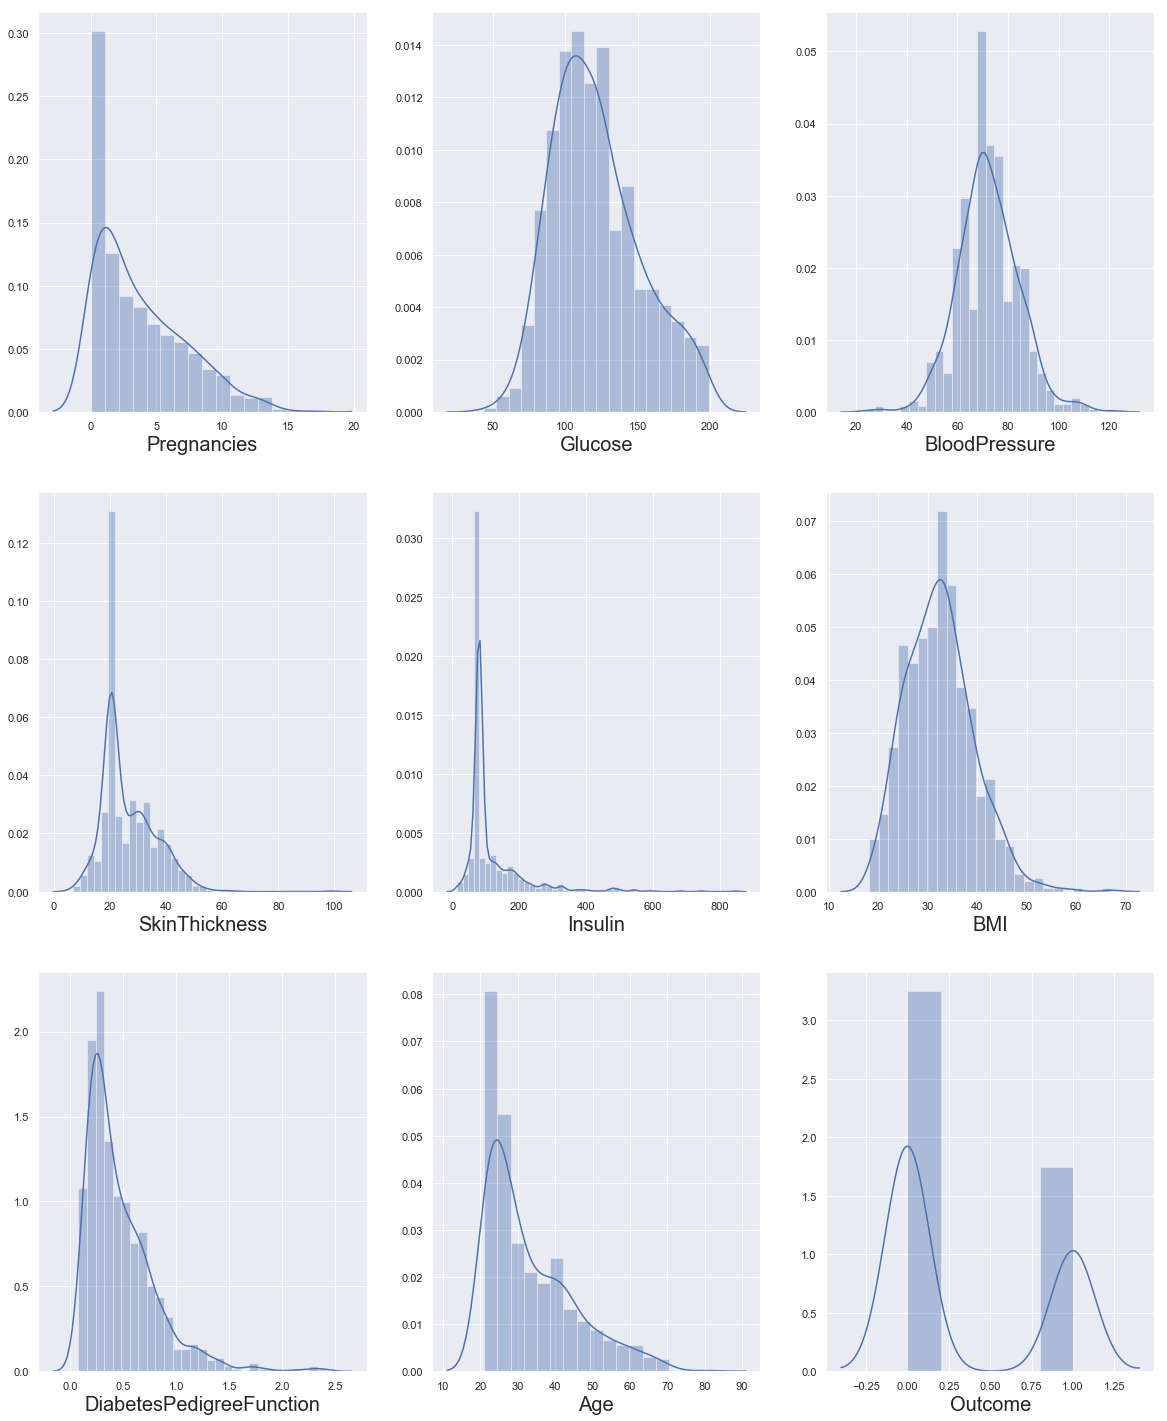

In [32]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [6]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

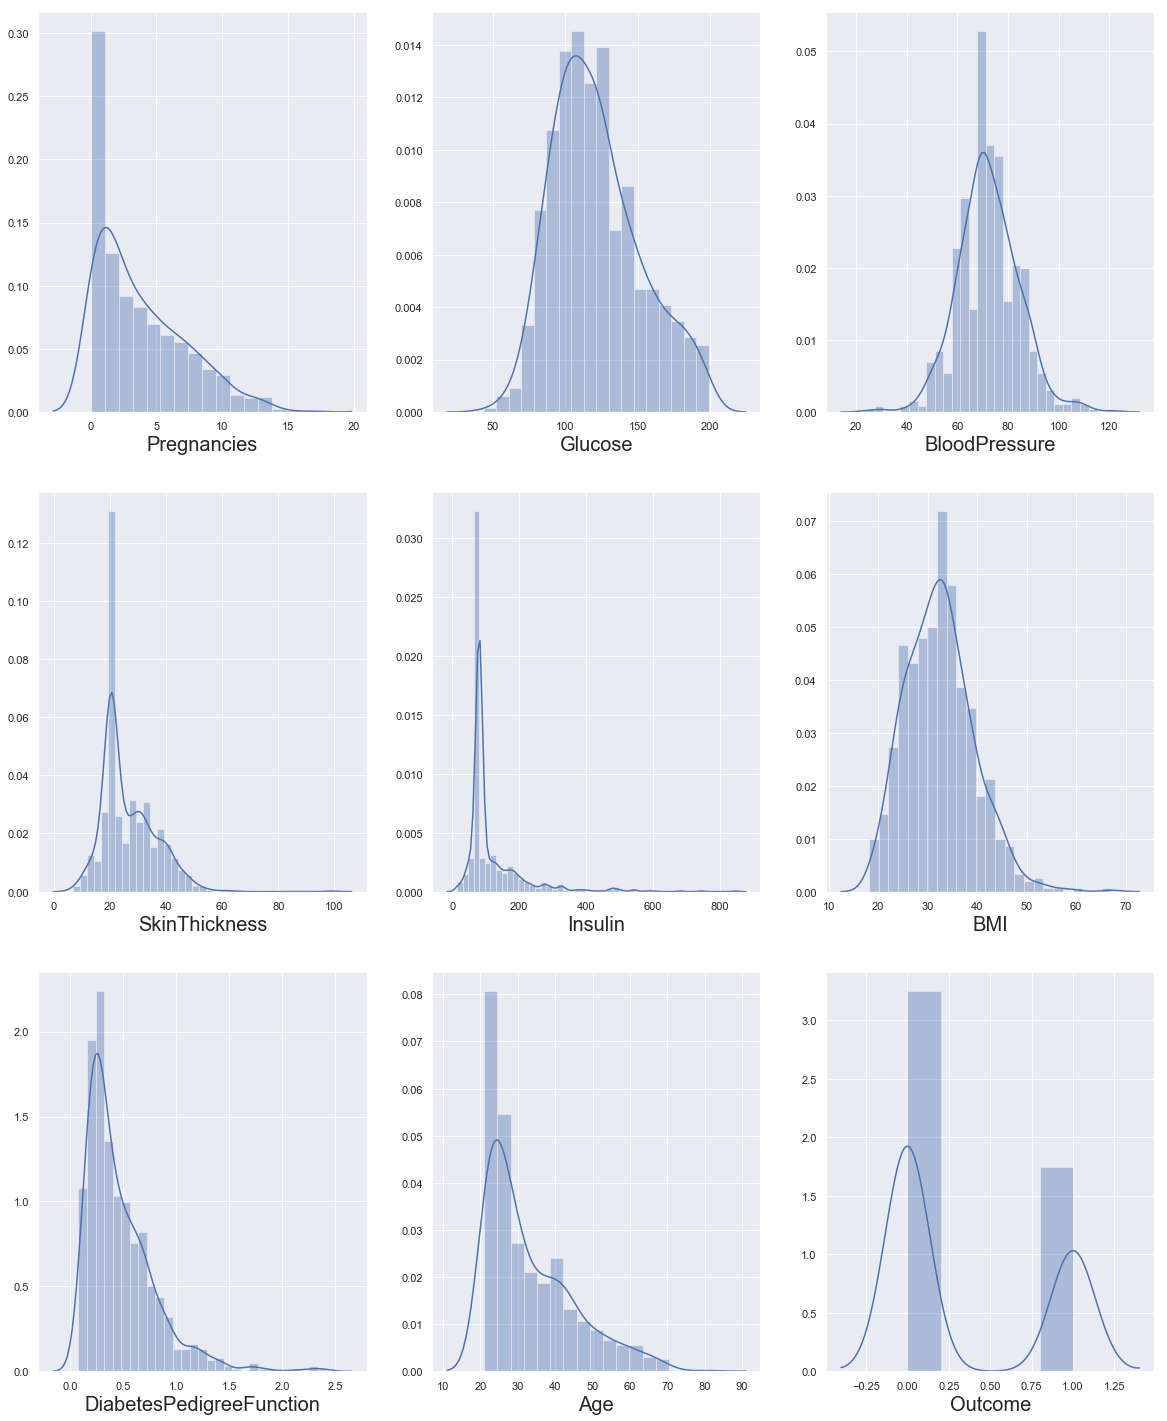

In [7]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
Let's deal with them.

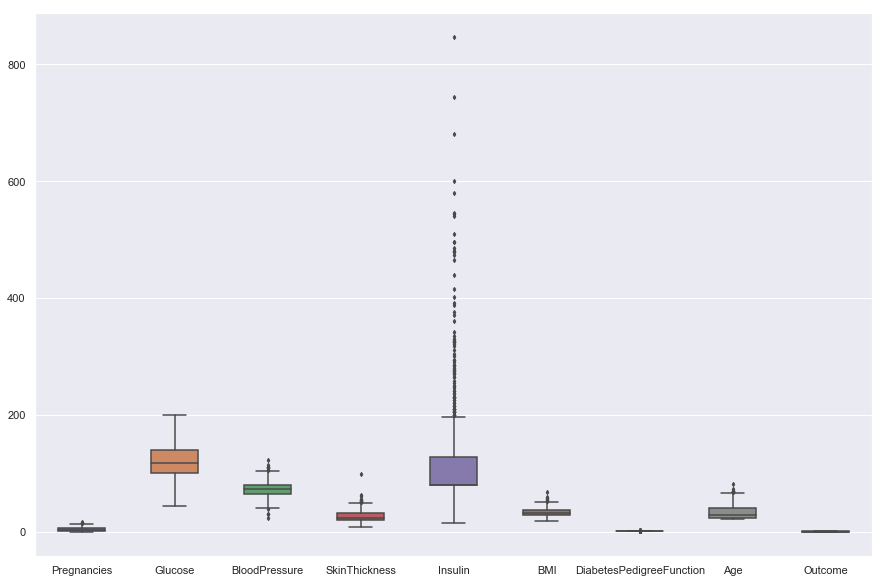

In [8]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [9]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

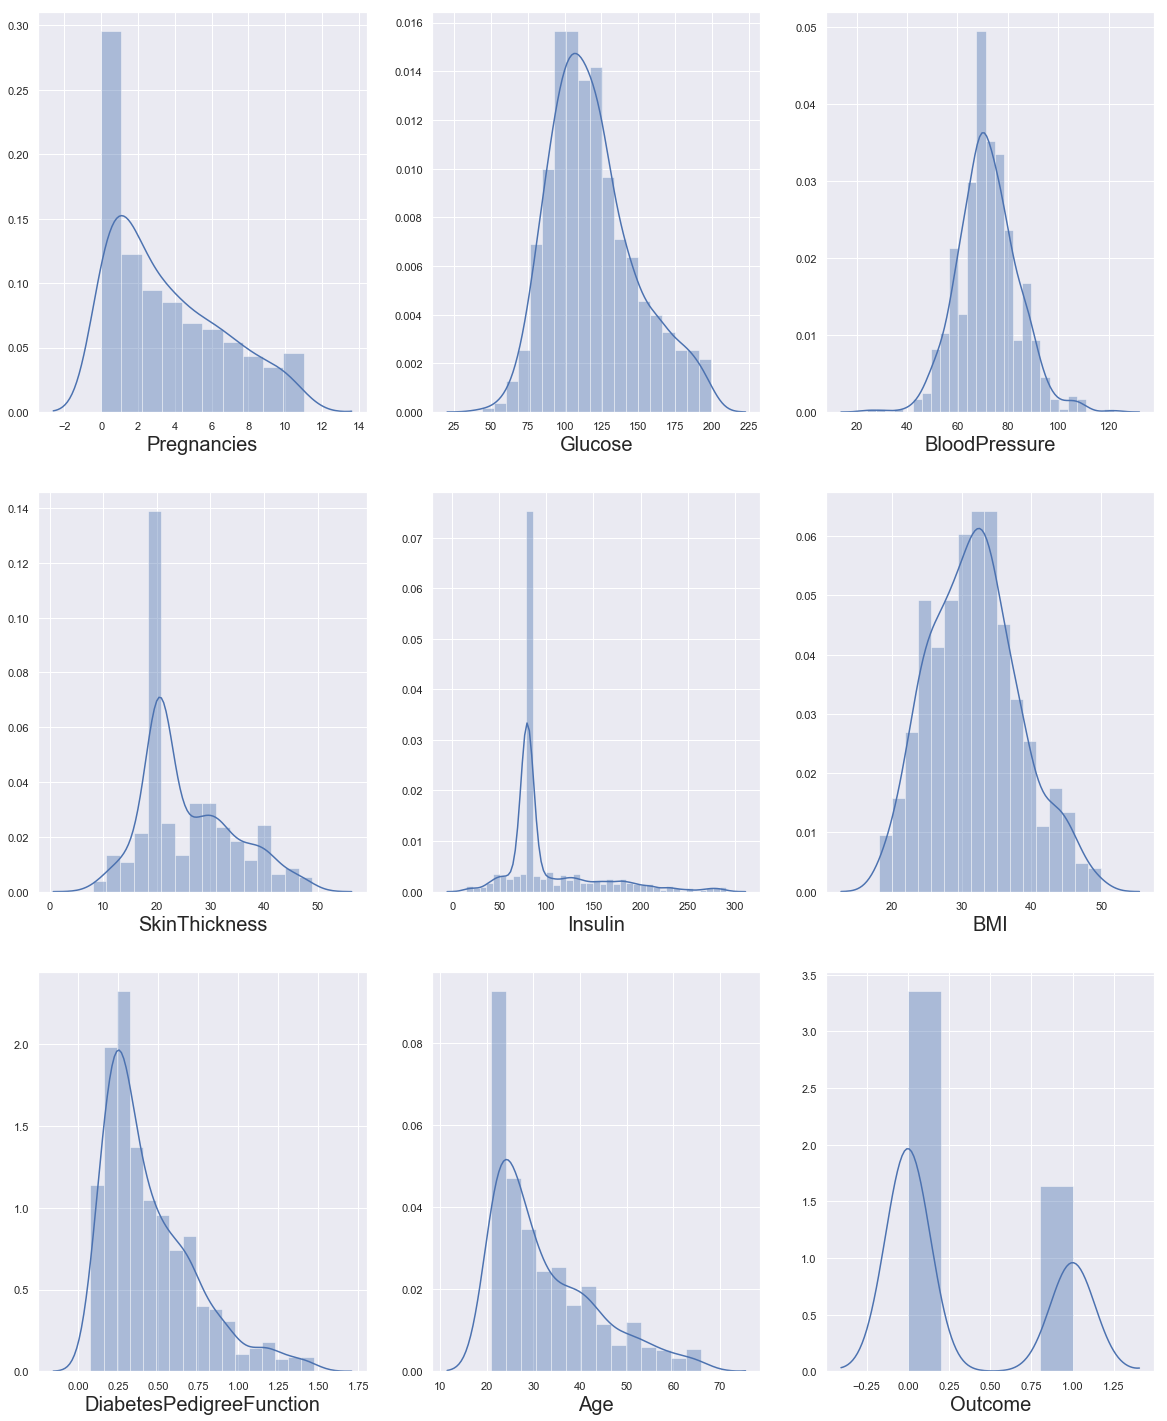

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


In [11]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

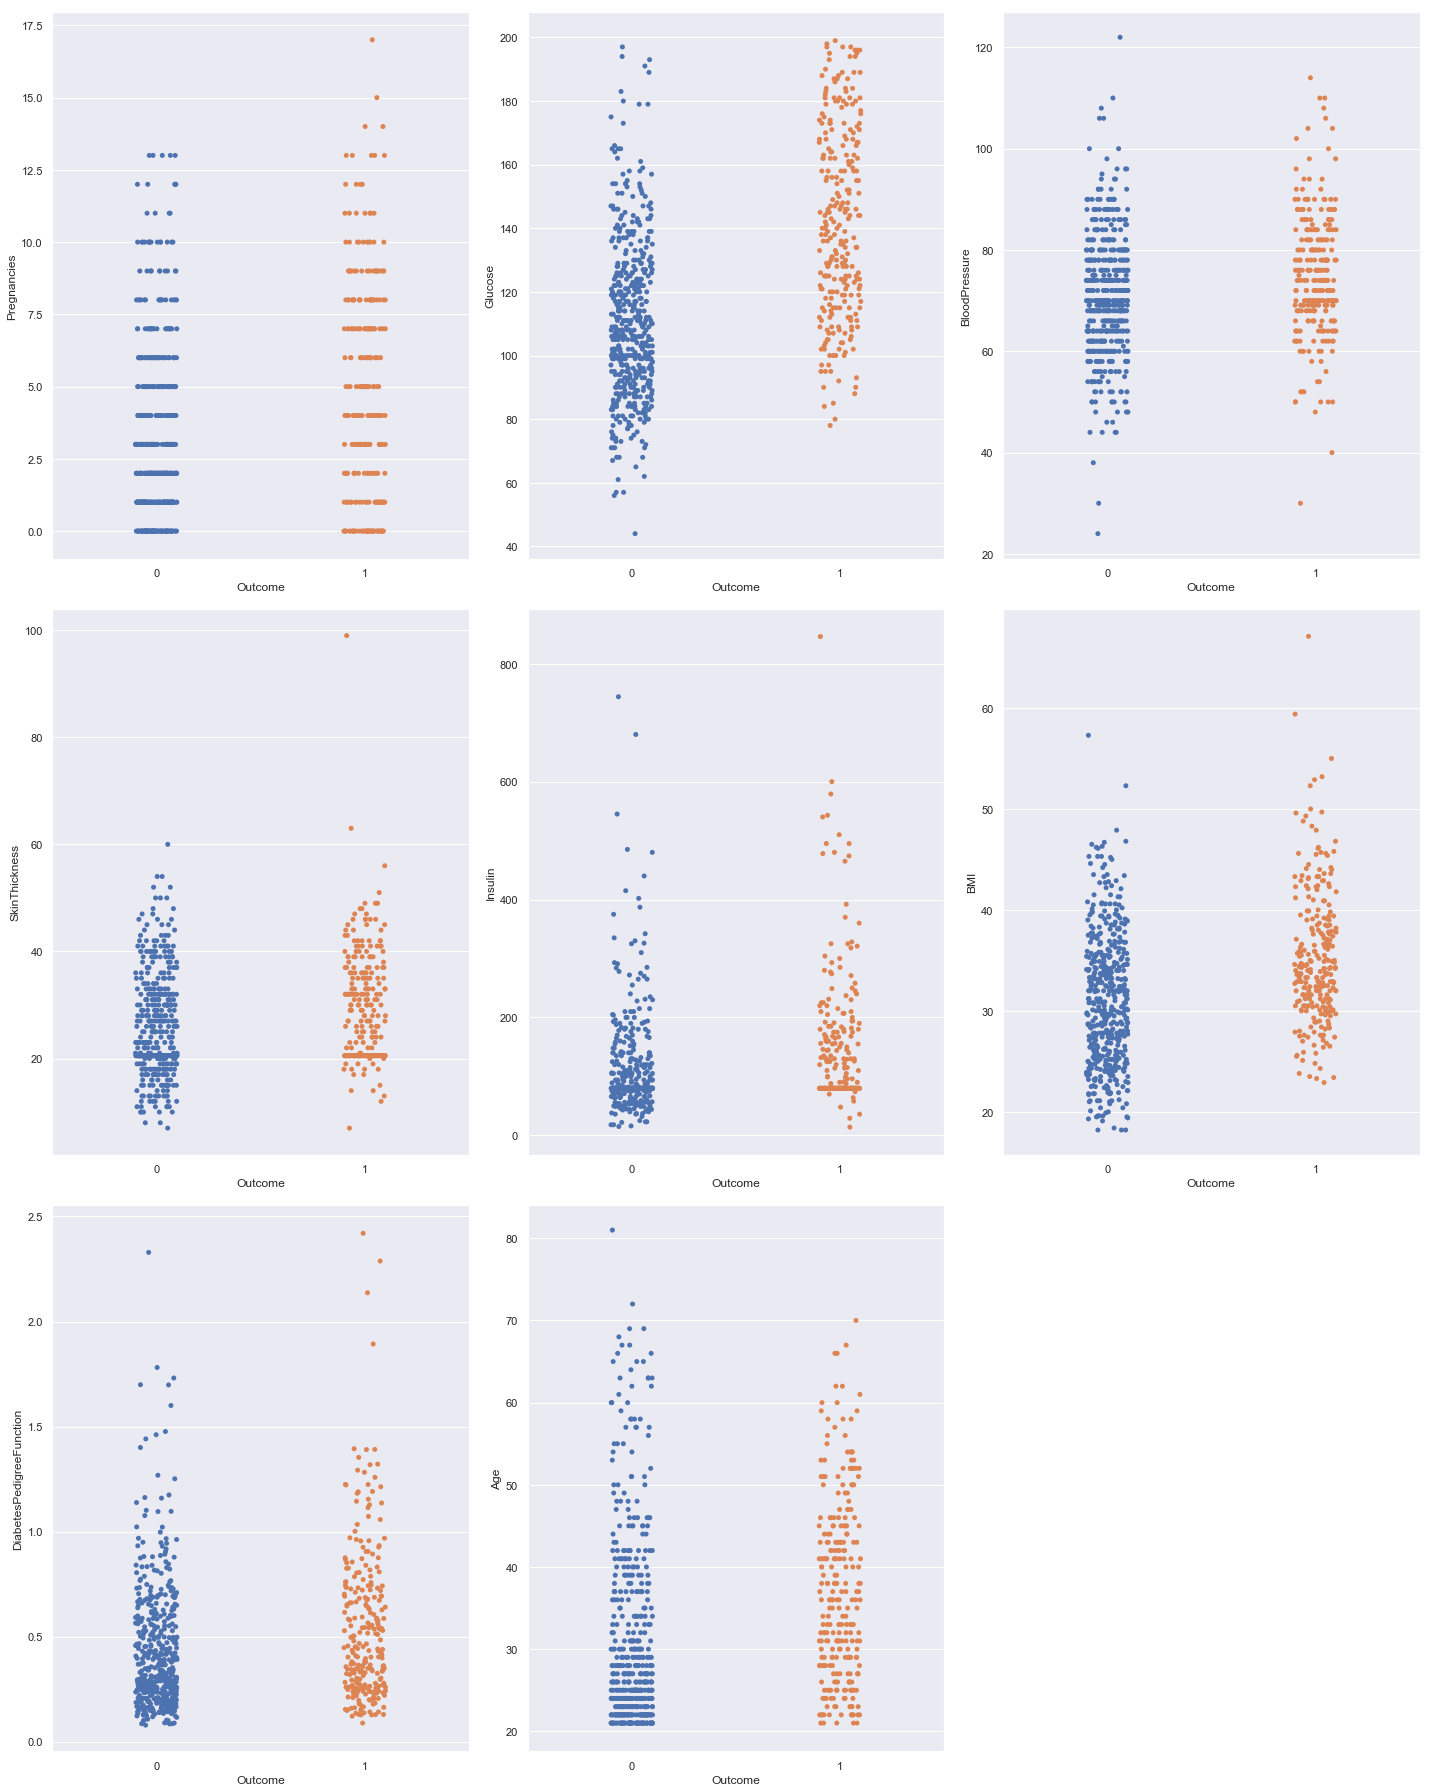

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [13]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [14]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [15]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.


In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [17]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

Let's see how well our model performs on the test data set.


In [21]:
y_pred = log_reg.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [24]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [25]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [26]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [27]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

In [28]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8239700374531835

In [29]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

**ROC**

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

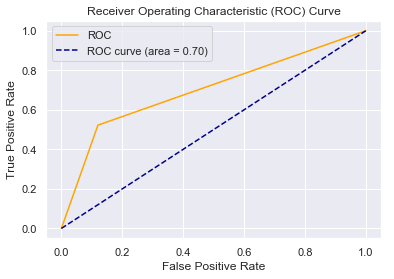

In [31]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.


#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes






## Cloud  Deployment (Heroku)

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are made using it. If the web app works fine, the same app is deployed to the cloud platform. The application flow for cloud deployment looks like:

<img src="testing_pipeline.PNG" width= "300">


### Pre-requisites for cloud deployment:
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* A Heroku account.
* Basic understanding of HTML.


### Steps before cloud deployment:

We need to change our code a bit so that it works unhindered on the cloud, as well.

* Add a file called ‘gitignore’ inside the project folder. This folder contains the list of the files which we don’t want to include in the git repository. My gitignore file looks like:

     **.idea**

As I am using PyCharm as an IDE, and it’s provided by the Intellij Idea community, it automatically adds the .idea folder containing some metadata. We need not include them in our cloud app.

* Add a file called ‘Procfile’ inside the ‘reviewScrapper’ folder. This folder contains the command to run the flask application once deployed on the server:

     **web: gunicorn app:app**

Here, the keyword ‘web’ specifies that the application is a web application. And the part ‘app:app’ instructs the program to look for a flask application called ‘app’ inside the ‘app.py’ file. Gunicorn is a Web Server Gateway Interface (WSGI) HTTP server for Python.

* Open a command prompt window and navigate to your ‘reviewScrapper’ folder. Enter the command ‘pip freeze > requirements.txt’. This command generates the ‘requirements.txt’ file

The requirements.txt helps the Heroku cloud app to install all the dependencies before starting the webserver.



After performing all the above steps the project structure will look like:

<img src="projectStructure.PNG" width="300">

### Deployment to Heroku:

* After installing the Heroku CLI, Open a command prompt window and navigate to your project folder.
* Type the command **heroku login** to login to your heroku account.
* After logging in to Heroku, enter the command **heroku create** to create a heroku app. It will give you the URL of your Heroku app after successful creation. Or alternatively, you can go to the heroku website and create an app directly.
* Before deploying the code to the Heroku cloud, we need to commit the changes to the git repository.
* Type the command **git init** to initialize a local git repository.
* Enter the command **git status** to see the uncommitted changes.
* Enter the command **git add .** to add the uncommitted changes to the local repository.
* Enter the command **git commit -am "make it better"** to commit the changes to the local repository.
* Enter the command **git push heroku master** to push the code to the heroku cloud.
* After deployment, heroku gives you the URL to hit the web API.
* Once your application is deployed successfully, enter the command **heroku logs --tail** to see the logs.



All the code is available in iNeuron git repo.